<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/ml-playground-starter/blob/main/PCA_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📉 Principal Component Analysis (PCA) & Dimensionality Reduction

This notebook explains **Principal Component Analysis (PCA)** — a fundamental technique in machine learning and data science for **dimensionality reduction** and **feature extraction**.

We'll go through:
1. Mathematical intuition  
2. Step-by-step implementation from scratch  
3. Visualization of variance and components  
4. Comparison with scikit-learn's PCA



## 🧮 1. Mathematical Foundation

PCA finds new axes (called **principal components**) that capture the **maximum variance** in the data.

### Given:
- A dataset $X \in \mathbb{R}^{n \times d}$ with $n$ samples and $d$ features.



### Steps:

1. **Standardize** the data (zero mean, unit variance):  
   $$
   X_{std} = X - \mu
   $$

2. **Compute the covariance matrix:**  
   $$
   \Sigma = \frac{1}{n-1} X_{std}^T X_{std}
   $$

3. **Eigen decomposition** of the covariance matrix:  
   $$
   \Sigma v = \lambda v
   $$
   - $v$: eigenvectors (principal directions)  
   - $\lambda$: eigenvalues (explained variance)

4. **Sort eigenvectors** by descending eigenvalues.

5. **Project** data onto the top-$k$ components:  
   $$
   X_{proj} = X_{std} W_k
   $$

Where $W_k$ is the matrix of the top-$k$ eigenvectors.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SKPCA

np.random.seed(42)



## ⚙️ 2. PCA Implementation from Scratch


In [2]:

class PCA_Scratch:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        # Standardize
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # Eigen decomposition
        eig_vals, eig_vecs = np.linalg.eigh(cov)

        # Sort by eigenvalue descending
        sorted_idx = np.argsort(eig_vals)[::-1]
        eig_vals = eig_vals[sorted_idx]
        eig_vecs = eig_vecs[:, sorted_idx]

        # Store components and explained variance
        self.components = eig_vecs[:, :self.n_components]
        self.explained_variance = eig_vals[:self.n_components]
        self.explained_variance_ratio = eig_vals[:self.n_components] / np.sum(eig_vals)

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



## 🌸 3. Apply PCA on the Iris Dataset


In [3]:

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA (2 components)
pca = PCA_Scratch(n_components=2)
X_pca = pca.fit_transform(X_std)

print("Explained variance ratio:", pca.explained_variance_ratio)


Explained variance ratio: [0.72962445 0.22850762]



## 🎨 4. Visualize the Reduced Data (2D Projection)


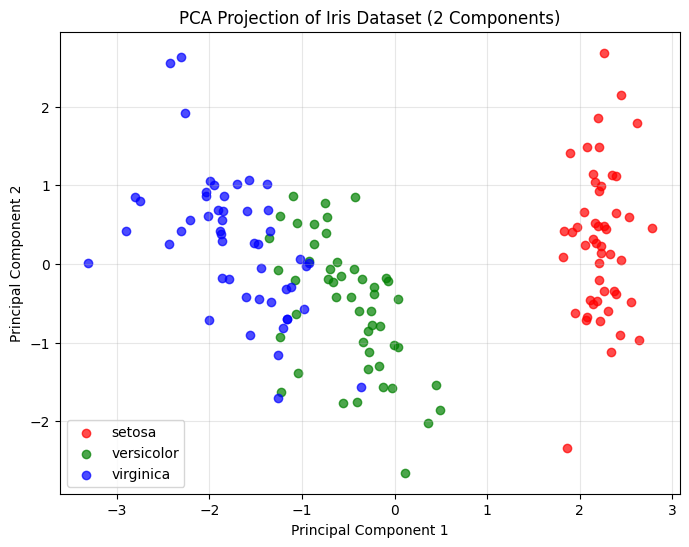

In [4]:

plt.figure(figsize=(8,6))
for label, color in zip(np.unique(y), ['red', 'green', 'blue']):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=iris.target_names[label], alpha=0.7, color=color)

plt.title("PCA Projection of Iris Dataset (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## 📊 5. Compare with scikit-learn's PCA


Explained variance ratio (scikit-learn): [0.72962445 0.22850762]


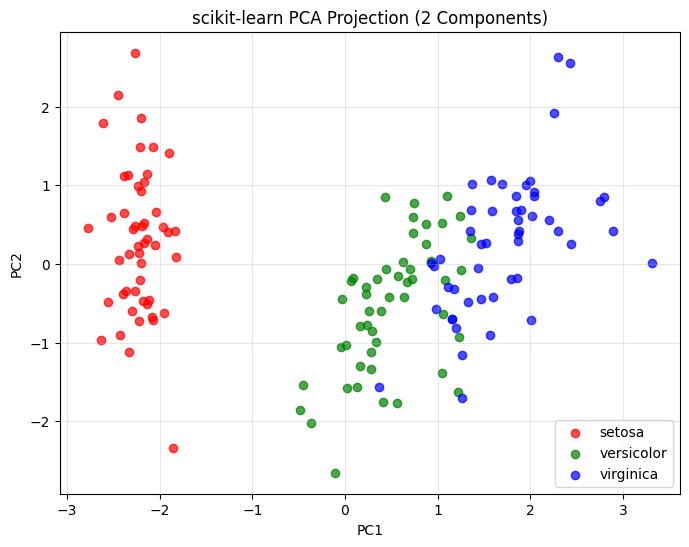

In [5]:

sk_pca = SKPCA(n_components=2)
X_pca_sk = sk_pca.fit_transform(X_std)

print("Explained variance ratio (scikit-learn):", sk_pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
for label, color in zip(np.unique(y), ['red', 'green', 'blue']):
    plt.scatter(X_pca_sk[y==label, 0], X_pca_sk[y==label, 1], label=iris.target_names[label], alpha=0.7, color=color)

plt.title("scikit-learn PCA Projection (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## 📈 6. Explained Variance Plot


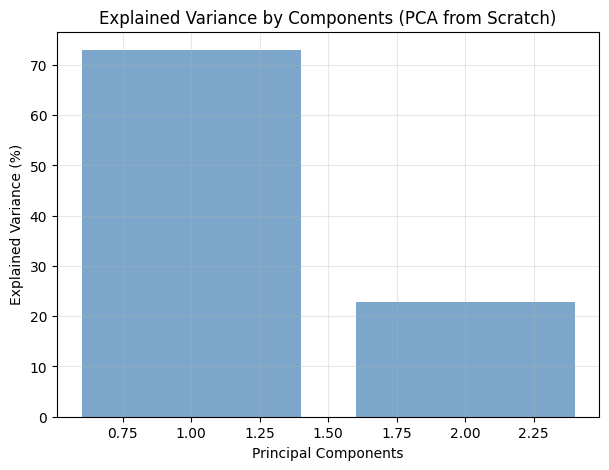

In [6]:

plt.figure(figsize=(7,5))
plt.bar(range(1, len(pca.explained_variance_ratio)+1), pca.explained_variance_ratio*100, alpha=0.7, color='steelblue')
plt.ylabel("Explained Variance (%)")
plt.xlabel("Principal Components")
plt.title("Explained Variance by Components (PCA from Scratch)")
plt.grid(True, alpha=0.3)
plt.show()



## ✅ Summary

- PCA reduces dimensionality by projecting data onto orthogonal directions of **maximum variance**.  
- The directions are found using **eigenvectors** of the covariance matrix.  
- Eigenvalues represent the **amount of variance** captured by each principal component.  
- PCA helps visualize high-dimensional data and improve computational efficiency.  

---

**Next project →** *t-SNE & UMAP Visualization*
